In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xarray
import glob
import matplotlib.colors as colors
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import palettable
from palettable.colorbrewer.sequential import YlOrRd_9,RdPu_9
from palettable.colorbrewer.diverging import RdYlGn_10_r
from wrf import getvar, ALL_TIMES
from netCDF4 import Dataset

In [34]:
path = '/jet/home/xjliu/Tanguro_exp/'
file1 = path+'post_processing/wrfinput_cat.nc'

with xarray.open_dataset(file1,decode_times=True,
                         mask_and_scale='True') as ds:
    T_obs = ds['T']
    
with xarray.open_dataset(path+'Tanguro201401/wrfout_d01_2014-01-01_00:00:00',decode_times=True,
                         mask_and_scale='True') as ds:
    lats = ds['XLAT'][0,:,0]
    lons = ds['XLONG'][0,0,:]
    levs = ds['ZNU'][0,:]

In [35]:
lons

<xarray.DataArray 'XLONG' (west_east: 80)>
array([-54.041004, -53.999462, -53.957916, -53.916374, -53.87483 , -53.833282,
       -53.79174 , -53.750195, -53.70865 , -53.667107, -53.62556 , -53.58402 ,
       -53.542473, -53.500927, -53.459385, -53.41784 , -53.376293, -53.33475 ,
       -53.293205, -53.251663, -53.210117, -53.16857 , -53.12703 , -53.085484,
       -53.04394 , -53.002396, -52.96085 , -52.919308, -52.87776 , -52.836216,
       -52.794674, -52.753128, -52.711586, -52.67004 , -52.628494, -52.586952,
       -52.545406, -52.503864, -52.46232 , -52.420773, -52.37923 , -52.337685,
       -52.29614 , -52.254597, -52.21305 , -52.17151 , -52.129963, -52.088417,
       -52.046875, -52.00533 , -51.963787, -51.92224 , -51.880695, -51.839153,
       -51.797607, -51.75606 , -51.71452 , -51.672974, -51.63143 , -51.589886,
       -51.54834 , -51.506798, -51.465252, -51.42371 , -51.382164, -51.34062 ,
       -51.299076, -51.25753 , -51.215984, -51.174442, -51.132896, -51.091354,
       -51.04981 , -51.008263, -50.96672 , -50.925175, -50.88363 , -50.842087,
       -50.80054 , -50.759   ], dtype=float32)
Coordinates:
    XLAT     (west_east) float32 ...
    XLONG    (west_east) float32 ...
    XTIME    datetime64[ns] ...
Dimensions without coordinates: west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  LONGITUDE, WEST IS NEGATIVE
    units:        degree_east
    stagger:

Text(0.5, 1.0, 'Standard Deviation of Theta Perturb')

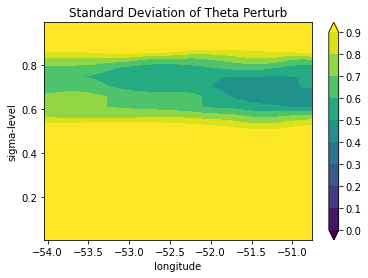

In [50]:
T_xmean = T_obs.mean('south_north')
T_xmean_std = T_xmean.std('Times')
plt.contourf(lons,levs,T_xmean_std,extend='both',
            levels=np.arange(0,1,0.1))
plt.colorbar()
plt.xlabel('longitude')
plt.ylabel('sigma-level')
plt.title('Standard Deviation of Theta Perturb')

#fig,axes = plt.subplots(1,3,figsize=(13,3.4),sharex=True,sharey=True)
#axes = axes.ravel()
#for ii in range(6):
#    axes[ii].contourf(T_xmean_std[:,:])